In [29]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import zscore, skew
import pickle
import json

import warnings
warnings.filterwarnings('ignore')

## problem statement

## data gathering 

In [2]:
df = pd.read_csv('train.csv')
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<AxesSubplot:>

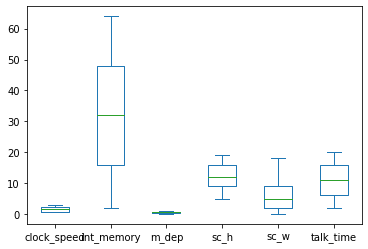

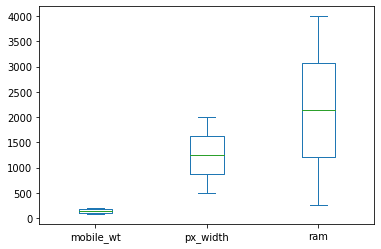

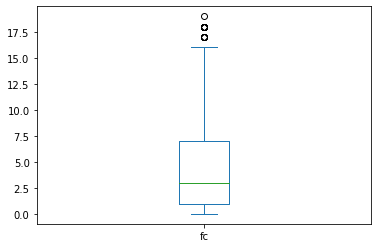

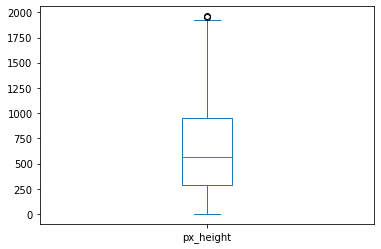

In [5]:
col_names1 = ['clock_speed','int_memory','m_dep','sc_h','sc_w','talk_time']
col_names2 = ['mobile_wt','px_width','ram']
col_names3 = ['fc']
col_names4 = ['px_height']
df[col_names1].plot(kind='box')
df[col_names2].plot(kind='box')
df[col_names3].plot(kind='box')
df[col_names4].plot(kind='box')

In [6]:
def RemoveOutliers(col_names):
    z_score_val =abs(zscore(df[col_names]))
    outlier_index= np.where(z_score_val >=3)[0]
    outliers = df[col_names]
    try :
        for i in range(len(outlier_index)):
            df[col_names].replace({df[col_names].iloc[outlier_index[i]]:df[col_names].median()}, inplace=True)
    except :
        pass
    
col_names = ['fc', 'px_height']

for columns in col_names :
    RemoveOutliers(columns)

In [7]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.219000   
std       439.418206     0.5001     0.816004     0.500035     4.208431   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    17.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [8]:
x = df.drop('price_range',axis=True)
y = df['price_range']

In [9]:
normal_scale = MinMaxScaler()
x_scaled = normal_scale.fit_transform(x)
x = pd.DataFrame(x_scaled,columns=x.columns)
x

battery_power  blue  clock_speed  dual_sim        fc  four_g  \
0          0.227789   0.0         0.68       0.0  0.058824     0.0   
1          0.347361   1.0         0.00       1.0  0.000000     1.0   
2          0.041416   1.0         0.00       1.0  0.117647     1.0   
3          0.076152   1.0         0.80       0.0  0.000000     0.0   
4          0.881764   1.0         0.28       0.0  0.764706     1.0   
...             ...   ...          ...       ...       ...     ...   
1995       0.195725   1.0         0.00       1.0  0.000000     1.0   
1996       0.977956   1.0         0.84       1.0  0.000000     0.0   
1997       0.941884   0.0         0.16       1.0  0.058824     1.0   
1998       0.675351   0.0         0.16       0.0  0.235294     1.0   
1999       0.006012   1.0         0.60       1.0  0.294118     1.0   

      int_memory     m_dep  mobile_wt   n_cores    pc  px_height  px_width  \
0       0.080645  0.555556   0.900000  0.142857  0.10   0.010204  0.170895   
1       0.822581  0.666667   0.466667  0.285714  0.30   0.461735  0.993324   
2       0.629032  0.888889   0.541667  0.571429  0.30   0.644388  0.811749   
3       0.129032  0.777778   0.425000  0.714286  0.45   0.620408  0.858478   
4       0.677419  0.555556   0.508333  0.142857  0.70   0.616327  0.475300   
...          ...       ...        ...       ...   ...        ...       ...   
1995    0.000000  0.777778   0.216667  0.714286  0.70   0.623469  0.927904   
1996    0.596774  0.111111   0.891667  0.428571  0.15   0.466837  0.977971   
1997    0.548387  0.666667   0.233333  1.000000  0.15   0.442857  0.755674   
1998    0.709677  0.000000   0.541667  0.571429  0.25   0.171429  0.113485   
1999    0.693548  0.888889   0.733333  0.714286  0.80   0.246429  0.169559   

           ram      sc_h      sc_w  talk_time  three_g  touch_screen  wifi  
0     0.612774  0.285714  0.388889   0.944444      0.0           0.0   1.0  
1     0.634687  0.857143  0.166667   0.277778      1.0           1.0   0.0  
2     0.627205  0.428571  0.111111   0.388889      1.0           1.0   0.0  
3     0.671566  0.785714  0.444444   0.500000      1.0           0.0   0.0  
4     0.308658  0.214286  0.111111   0.722222      1.0           1.0   0.0  
...        ...       ...       ...        ...      ...           ...   ...  
1995  0.110102  0.571429  0.222222   0.944444      1.0           1.0   0.0  
1996  0.474613  0.428571  0.555556   0.777778      1.0           1.0   1.0  
1997  0.748530  0.285714  0.055556   0.166667      1.0           1.0   0.0  
1998  0.163816  0.928571  0.555556   0.944444      1.0           1.0   1.0  
1999  0.978888  1.000000  0.222222   0.000000      1.0           1.0   1.0  

[2000 rows x 20 columns]

## train test split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=5,stratify=y)
x_train

battery_power  blue  clock_speed  dual_sim        fc  four_g  \
1549       0.849031   1.0         0.44       0.0  1.000000     1.0   
1712       0.856379   1.0         0.00       0.0  0.470588     0.0   
415        0.169673   1.0         0.92       0.0  0.294118     1.0   
800        0.626587   0.0         0.16       0.0  0.705882     1.0   
537        0.157649   1.0         0.76       1.0  0.411765     0.0   
...             ...   ...          ...       ...       ...     ...   
164        0.627923   0.0         0.64       1.0  0.647059     1.0   
1053       0.081496   1.0         0.16       0.0  0.058824     1.0   
304        0.451570   0.0         0.16       0.0  0.058824     1.0   
1782       0.624582   1.0         0.76       1.0  0.176471     1.0   
1673       0.670007   0.0         0.56       1.0  0.411765     1.0   

      int_memory     m_dep  mobile_wt   n_cores    pc  px_height  px_width  \
1549    0.693548  0.444444   0.658333  0.142857  0.90   0.427041  0.604139   
1712    0.193548  0.555556   0.858333  1.000000  0.55   0.464286  0.711615   
415     0.790323  0.222222   0.883333  0.428571  0.60   0.160714  0.327103   
800     0.290323  0.777778   0.558333  0.000000  0.85   0.319388  0.288385   
537     0.758065  0.555556   0.941667  0.428571  0.80   0.398469  0.642857   
...          ...       ...        ...       ...   ...        ...       ...   
164     0.016129  0.000000   0.316667  1.000000  0.85   0.294388  0.381175   
1053    0.016129  0.000000   0.183333  1.000000  0.35   0.892347  0.855140   
304     0.435484  0.333333   0.925000  0.142857  0.40   0.090816  0.255007   
1782    0.338710  0.222222   0.216667  0.571429  0.20   0.096429  0.608144   
1673    0.370968  0.222222   0.600000  0.428571  0.45   0.201531  0.903204   

           ram      sc_h      sc_w  talk_time  three_g  touch_screen  wifi  
1549  0.237841  0.071429  0.055556   0.833333      1.0           1.0   0.0  
1712  0.416889  0.500000  0.388889   0.277778      0.0           0.0   1.0  
415   0.662213  0.357143  0.055556   0.777778      1.0           0.0   1.0  
800   0.409941  1.000000  0.666667   0.722222      1.0           0.0   1.0  
537   0.720203  0.142857  0.000000   0.444444      0.0           1.0   0.0  
...        ...       ...       ...        ...      ...           ...   ...  
164   0.550775  0.785714  0.222222   0.277778      1.0           0.0   1.0  
1053  0.876804  0.785714  0.722222   0.055556      1.0           0.0   1.0  
304   0.014698  0.928571  0.277778   0.944444      1.0           0.0   0.0  
1782  0.596472  0.214286  0.222222   0.333333      1.0           0.0   0.0  
1673  0.409407  0.571429  0.611111   0.611111      1.0           0.0   1.0  

[1500 rows x 20 columns]

In [11]:
models = [LogisticRegression(multi_class='ovr'), KNeighborsClassifier(), DecisionTreeClassifier()]
test_accurary = []
train_accurary =[]

for model in models :
    model_instance = model
    model_instance.fit(x_train, y_train)
    test_accurary.append(model_instance.score(x_test, y_test))
    train_accurary.append(model_instance.score(x_train, y_train))
    
test_accurary
print(model_instance)

DecisionTreeClassifier()


## evalution

In [12]:
#model evaluton on testing data

y_pred = model_instance.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('confusion matrix :\n',cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print('\naccuracy :', accuracy)

clf_report = classification_report(y_test, y_pred)
print('\nclassification reoprt :\n',clf_report)


confusion matrix :
 [[114  11   0   0]
 [  9 109   7   0]
 [  0  12 101  12]
 [  0   0  22 103]]

accuracy : 0.854

classification reoprt :
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       125
           1       0.83      0.87      0.85       125
           2       0.78      0.81      0.79       125
           3       0.90      0.82      0.86       125

    accuracy                           0.85       500
   macro avg       0.86      0.85      0.85       500
weighted avg       0.86      0.85      0.85       500



In [13]:
#model evalution on training data

y_pred_train = model_instance.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('confusion matrix :\n',cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print('\naccuracy :', accuracy)

clf_report = classification_report(y_train, y_pred_train)
print('\nclassification reoprt :\n',clf_report)


confusion matrix :
 [[375   0   0   0]
 [  0 375   0   0]
 [  0   0 375   0]
 [  0   0   0 375]]

accuracy : 1.0

classification reoprt :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       375
           2       1.00      1.00      1.00       375
           3       1.00      1.00      1.00       375

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



## plot descision tree

In [14]:
plt.figure(figsize=(200,150))
plot_tree(model_instance, feature_names=x.columns, class_names=['0','1','2','3'],filled=True)
plt.savefig('Decision_Tree_Without_HYP.png')

## hyperparameter tuning

In [15]:
dt_model =DecisionTreeClassifier()
hyperparameters = {'criterion':['gini','Entropy'],
                  'max_depth': np.arange(3,8),
                  'min_samples_split' : np.arange(2,20),
                  'min_samples_leaf':np.arange(2,15)}

gscv_dt_clf = GridSearchCV(dt_model,hyperparameters, cv = 5)
gscv_dt_clf.fit(x_train, y_train)
 
best_estimater = gscv_dt_clf.best_estimator_


In [24]:
model= best_estimater
model

DecisionTreeClassifier(max_depth=6, min_samples_leaf=11, min_samples_split=5)

In [17]:
#model evaluton on testing data
model_instance
y_pred = model_instance.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('confusion matrix :\n',cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print('\naccuracy :', accuracy)

clf_report = classification_report(y_test, y_pred)
print('\nclassification reoprt :\n',clf_report)


confusion matrix :
 [[114  11   0   0]
 [  9 109   7   0]
 [  0  12 101  12]
 [  0   0  22 103]]

accuracy : 0.854

classification reoprt :
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       125
           1       0.83      0.87      0.85       125
           2       0.78      0.81      0.79       125
           3       0.90      0.82      0.86       125

    accuracy                           0.85       500
   macro avg       0.86      0.85      0.85       500
weighted avg       0.86      0.85      0.85       500



In [18]:
#model evalution on training data
model_instance = best_estimater
y_pred_train = model_instance.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('confusion matrix :\n',cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print('\naccuracy :', accuracy)

clf_report = classification_report(y_train, y_pred_train)
print('\nclassification reoprt :\n',clf_report)


confusion matrix :
 [[350  25   0   0]
 [ 19 336  20   0]
 [  0  25 334  16]
 [  0   0  31 344]]

accuracy : 0.9093333333333333

classification reoprt :
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       375
           1       0.87      0.90      0.88       375
           2       0.87      0.89      0.88       375
           3       0.96      0.92      0.94       375

    accuracy                           0.91      1500
   macro avg       0.91      0.91      0.91      1500
weighted avg       0.91      0.91      0.91      1500



In [19]:
plt.figure(figsize=(200,150))
plot_tree(model_instance, feature_names=x.columns, class_names=['0','1','2','3'],filled=True)
plt.savefig('Decision_Tree_Without_HYP.png')

## pruning

In [22]:
ccp = best_estimater.cost_complexity_pruning_path(x_train, y_train)
ccp_val = ccp['ccp_alphas']
test_accuracy = []
train_accuracy = []

for ccpalpha in ccp_val :
    model = DecisionTreeClassifier(ccp_alpha = ccpalpha, random_state = 5)
    model.fit(x_train, y_train)
    test_result = model.score(x_test, y_test)
    test_accuracy.append(test_result)
    train_result = model.score(x_train, y_train)
    train_accuracy.append(train_result)
    
result = pd.concat([pd.Series(ccp_val), pd.Series(test_accuracy), pd.Series(train_accuracy)], axis = 1)
ccp_index = np.where(test_accuracy == max(test_accuracy))[0]

best_ccp = ccp_val[ccp_index][0]


In [ ]:
pruned_model = DecisionTreeClassifier(ccp_alpha = best_ccp, random_state = 5)
pruned_model.fit(x_train, y_train)

In [27]:
with open ('Decision_Tree_model.pkl','wb') as f :
    pickle.dump(model,f)

In [31]:
json_data = {'columns':list(x.columns)}

with open('json_data.json','w') as f :
    json.dump(json_data,f)

In [32]:
x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')